<a href="https://colab.research.google.com/github/gnc506/Skills_Assessment/blob/main/Skills_assessment_2_HM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#load datasets
articles_data = pd.read_csv('/content/drive/MyDrive/articles.Dengue.csv')
authors_data = pd.read_csv('/content/drive/MyDrive/authors.Dengue.csv')
paper_count_data = pd.read_csv('/content/drive/MyDrive/paper_counts.csv')

In [4]:
articles_data

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation
0,10548291,Hospitalizations for suspected dengue in Puert...,Capture-recapture estimations compare the resu...,0002-9637,The American journal of tropical medicine and ...,(61) 574-8,1999,E J,Dechant,EJ,"Harvard Medical School, Boston, Massachusetts,..."
1,10548309,Dynamics of susceptibility and transmissibilit...,Dengue-1 virus PDK13 and isolates from vaccine...,0002-9637,The American journal of tropical medicine and ...,(61) 672-6,1999,N,Jirakanjanakit,N,"Center for Vaccine Development, Institute of S..."
2,10555454,Childhood dengue shock syndrome in Trinidad.,Dengue haemorrhagic fever/dengue shock syndrom...,0043-3144,The West Indian medical journal,(48) 115-7,1999,S,Teelucksingh,S,NaN
3,10559263,A novel in vitro replication system for Dengue...,Positive strand viral replicases are membrane-...,0021-9258,The Journal of biological chemistry,(274) 33714-22,1999,S,You,S,"Department of Biochemistry, University of Kans..."
4,10588771,Dengue: an evaluation of dengue severity in Fr...,We conducted a retrospective study of 403 labo...,1360-2276,Tropical medicine & international health : TM ...,(4) 765-73,1999,B,Murgue,B,"Unité de Virologie, Institut Territorial de Re..."
...,...,...,...,...,...,...,...,...,...,...,...
9661,38081831,"Interactions between climate change, urban inf...","Dengue is expanding globally, but how dengue e...",2041-1723,Nature communications,(14) 8179,2023,Rory,Gibb,R,Department of Infectious Disease Epidemiology ...
9662,38086397,Emergence of Dengue Virus Serotype 2 Cosmopoli...,Using Oxford Nanopore technologies and phyloge...,1080-6059,Emerging infectious diseases,10.3201/eid3001.230972,2023,David,Martínez,D,NaN
9663,38090413,A Narrative Review of Maternal and Perinatal O...,Dengue is one of the most prevalent mosquito-b...,2168-8184,Cureus,(15) e48640,2023,Shivani,Ahuja,S,"Community Medicine, Jawaharlal Nehru Medical C..."
9664,38095160,Liver enzyme alteration in response to dengue ...,Infectious diseases are extremely important in...,1130-0108,Revista espanola de enfermedades digestivas,10.17235/reed.2023.10102/2023,2023,Marta,Álvarez-García,M,"Aparato Digestivo, Hospital Universitario Fund..."


In [5]:
authors_data

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation
0,10548291,1,E J,Dechant,EJ,"Harvard Medical School, Boston, Massachusetts,..."
1,10548291,2,J G,Rigau-Pérez,JG,NaN
2,10548309,1,N,Jirakanjanakit,N,"Center for Vaccine Development, Institute of S..."
3,10548309,2,M M,Khin,MM,NaN
4,10548309,3,S,Yoksan,S,NaN
...,...,...,...,...,...,...
67330,38095160,2,Lola,Otegui,L,"Aparato Digestivo, Hospital Universitario Fund..."
67331,38095160,3,Adriana,Ortega Larrodé,A,"Aparato Digestivo, Hospital Universitario Fund..."
67332,38095160,4,Rocío,Calvo Hernández,R,"Aparato Digestivo, Hospital Universitario Fund..."
67333,38096143,1,Mahadee,Al Mobin,M,"Department of Mathematics, University of Dhaka..."


In [5]:
#Institutes with the most number of articles published.
articles_data1 = articles_data.copy()
articles_data1['FirstAuthorAffiliation'] = articles_data['FirstAuthorAffiliation'].fillna(method='ffill')
articles_data1

#authors_data.to_csv('author_data.csv')
authors1 = authors_data.copy()
authors1['AuthorAffiliation'] = authors1['AuthorAffiliation'].fillna(method='ffill')
authors1 = authors1.groupby('AuthorAffiliation')['PMID'].count().reset_index()
authors2 = authors1.sort_values(by = 'PMID', ascending = False)
authors2 = authors2.rename(columns= {'AuthorAffiliation' : 'Institute', 'PMID' : 'Number of articles published'})
authors2

,Institute,Number of articles published
12361,"Environmental Health Institute, National Envir...",77
12166,"Eijkman Institute for Molecular Biology, Jakar...",76
10675,"Department of Virology, Armed Forces Research ...",71
19766,"Novartis Institute for Tropical Diseases, Sing...",70
19992,"Oxford University Clinical Research Unit, Ho C...",64
...,...,...
13884,"Graduate University of Science and Technology,...",1
13885,"Graduate student, Computer Science , Rutgers U...",1
13886,"Graduation Program of Health Sciences, Faculty...",1
13887,"Graduação em Medicina Veterinária, Faculdade d...",1


In [6]:
#Top 10 institutes with the most number of articles published.

authors3 = authors2.head(10)
authors3

,Institute,Number of articles published
12361,"Environmental Health Institute, National Envir...",77
12166,"Eijkman Institute for Molecular Biology, Jakar...",76
10675,"Department of Virology, Armed Forces Research ...",71
19766,"Novartis Institute for Tropical Diseases, Sing...",70
19992,"Oxford University Clinical Research Unit, Ho C...",64
7438,"Department of Medical Biotechnologies, Univers...",54
5600,"Department of Clinical Tropical Medicine, Facu...",52
3522,"Dengue Branch, Centers for Disease Control and...",52
6921,"Department of Infectious Diseases, Molecular V...",52
20008,"Oxford University Clinical Research Unit, Hosp...",46


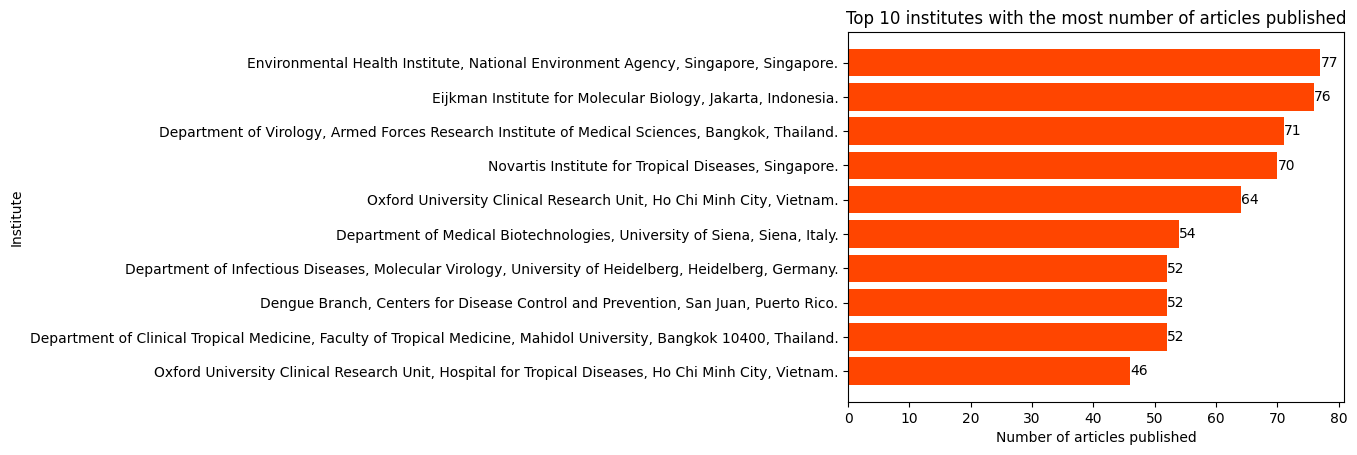

In [7]:
#Horizontal bar plot for the top 10 institutes with the most number of articles published.

authors4 = authors3.sort_values(by='Number of articles published', ascending = True)

fig, ax = plt.subplots()
bars = ax.barh(authors4['Institute'], authors4['Number of articles published'], color='orangered')

for bar, value in zip(bars, authors4['Number of articles published']):
  plt.text(bar.get_width(),bar.get_y() + bar.get_height()/2, value,
           ha ='left', va = 'center', color = 'black', fontsize = 10)

ax.set_xlabel('Number of articles published')
ax.set_ylabel('Institute')
ax.set_title('Top 10 institutes with the most number of articles published')

plt.show()

In [8]:
#Top 10 institutes with the most number of articles published since 2018

#Merging both the datasets
merged_df = pd.merge(articles_data, authors_data, on = 'PMID')
merged_df.head(10)

merged_df['AuthorAffiliation'] = merged_df['AuthorAffiliation'].fillna(method='ffill')

#Selecting articles posted between 2018 and 2024
selected_rows = merged_df[(merged_df['Year'] >= 2018) & (merged_df['Year'] <= 2024)]
#SR_sort= selected_rows.sort_values(by = 'Year', ascending = False)
#SR_sort

#Top 10 institutes with the most number of publications in the last 5 years
Institute_article_counts = selected_rows.groupby(['AuthorAffiliation']).agg({'PMID': 'count'}).reset_index()
#Institute_article_counts
aad = Institute_article_counts.sort_values(by = 'PMID', ascending = False)
aad = aad.rename(columns ={'AuthorAffiliation' : 'Institute','PMID':'Number of articles published'})

aad1 = aad.head(10)
aad

,Institute,Number of articles published
7415,"Environmental Health Institute, National Envir...",73
4610,"Department of Medical Biotechnologies, Univers...",54
4723,"Department of Medical Oncology and Pneumology,...",38
6868,Division of Epidemiology and Communicable Dise...,38
2184,"Dengue Branch, Centers for Disease Control and...",38
...,...,...
8765,"Hospital Tengku Ampuan Rahimah, Internal Medic...",1
8766,"Hospital Tengku Ampuan Rahimah, Internal Medic...",1
8767,"Hospital Universitari Vall d'Hebron, P° Vall d...",1
8768,Hospital Universitario Nuestra Señora de la Ca...,1


In [8]:
aad1

,Institute,Number of articles published
7415,"Environmental Health Institute, National Envir...",73
4610,"Department of Medical Biotechnologies, Univers...",54
4723,"Department of Medical Oncology and Pneumology,...",38
6868,Division of Epidemiology and Communicable Dise...,38
2184,"Dengue Branch, Centers for Disease Control and...",38
4351,"Department of Integrative Biology, University ...",37
14380,"Unité de Virologie Structurale, Institut Paste...",35
7240,"Drug Discovery and Development Division, Patan...",35
15020,"Wadsworth Center, New York State Department of...",35
4331,Department of Infectomics and Molecular Pathog...,34


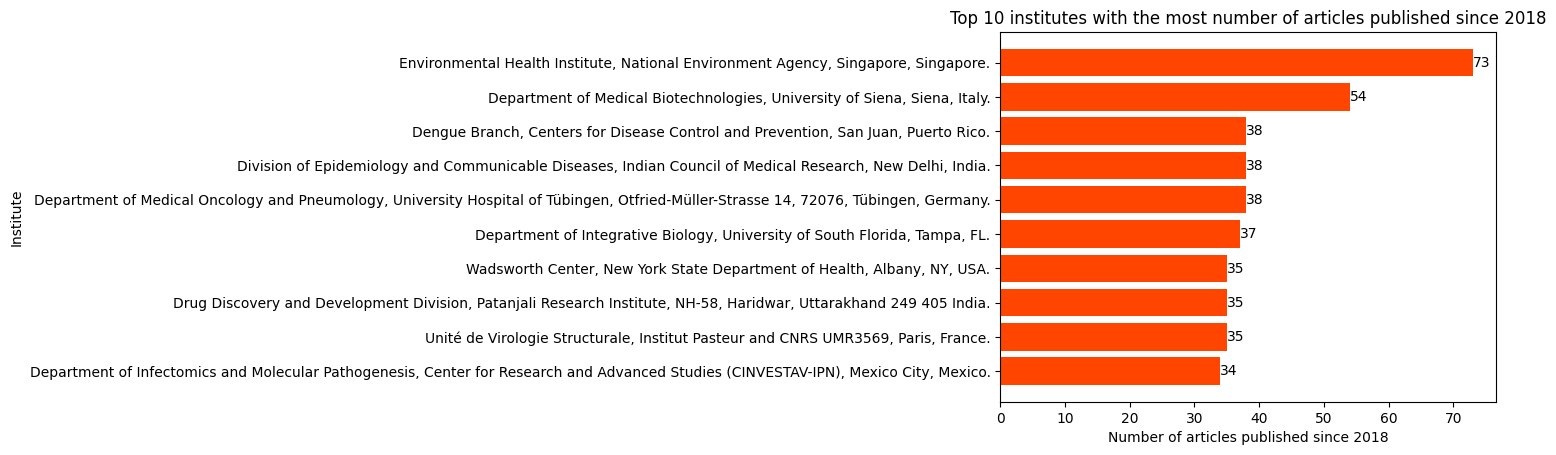

In [9]:
#Horizontal bar plot for the top 10 institutes with the most number of articles published since 2018

aad2 = aad1.sort_values(by='Number of articles published', ascending = True)

fig, ax = plt.subplots()
bars = ax.barh(aad2['Institute'], aad2['Number of articles published'], color='orangered')

for bar, value in zip(bars, aad2['Number of articles published']):
  plt.text(bar.get_width(),bar.get_y() + bar.get_height()/2, value,
           ha ='left', va = 'center', color = 'black', fontsize = 10)

ax.set_xlabel('Number of articles published since 2018')
ax.set_ylabel('Institute')
ax.set_title('Top 10 institutes with the most number of articles published since 2018')

plt.show()

In [10]:
pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 31.2 MB/s eta 0:00:00


In [15]:
import plotly.express as px

joining = pd.merge(articles_data, authors_data, on = 'PMID')
joining

# Define a function to extract the country name
def extract_country(institute):
    return institute.split(",")[-1].strip()

column_to_check = 'AuthorAffiliation'
joining = joining.dropna(subset = [column_to_check])
joining['country'] = joining['AuthorAffiliation'].apply(extract_country)
joining

# Clean country names
joining['country'] = joining['country'].str.split('.').str[0].str.strip()

joining['country'] = joining['country'].replace('Brasil', 'Brazil')
# Apply the function to the 'institute' column and create a new 'country' column

joining = joining.groupby(['Year','country'])['PMID'].count().reset_index()

joining = joining[joining['Year'] >= 1998]

import pycountry

# Get a list of all country names
country_names = [country.name for country in pycountry.countries]

joining = joining[joining['country'].isin(country_names)]

joining
#joining['country']=joining['country'].drop_duplicates()
#joining =joining.sort_values(by = 'PMID', ascending = False)

#map3 = map2.head(30)
#px.choropleth(map3.reset_index(), locations='country', locationmode = 'country names',color='Number of articles published',hover_data=['country','Number of articles published'], title = 'Publications by country')


,Year,country,PMID
10,1998,India,1
13,1999,Australia,1
14,1999,Brazil,2
16,1999,France,3
17,1999,French Polynesia,1
...,...,...,...
3543,2024,Ireland,1
3544,2024,Japan,11
3546,2024,Mexico,1
3547,2024,Nepal,1


In [16]:
brazil_rows = joining[joining['country'] == 'Brazil']

print(brazil_rows)

      Year country  PMID
14    1999  Brazil     2
29    2000  Brazil     1
62    2001  Brazil     2
90    2002  Brazil     6
125   2003  Brazil     6
164   2004  Brazil    12
201   2005  Brazil     9
257   2006  Brazil     9
308   2007  Brazil    11
361   2008  Brazil    24
427   2009  Brazil    27
498   2010  Brazil    19
565   2011  Brazil    29
642   2012  Brazil    34
733   2013  Brazil    60
833   2014  Brazil   202
1039  2015  Brazil   330
1388  2016  Brazil   489
1773  2017  Brazil   530
2077  2018  Brazil   525
2374  2019  Brazil   481
2617  2020  Brazil   541
2876  2021  Brazil   640
3091  2022  Brazil   583
3302  2023  Brazil   605
3537  2024  Brazil     3


In [17]:
import plotly.express as px

# Plotting the animated choropleth
fig = px.choropleth(joining,
                    locations='country',
                    locationmode='country names',
                    color='PMID',
                    animation_frame='Year',
                    title='Dengue article publications by country per year',
                    color_continuous_scale='Viridis',
                    labels={'PMID': 'Count'})

# Setting the frame duration
fig.update_layout(updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play',
                                method='animate', args=[None, dict(frame=dict(duration=1800, redraw=True), fromcurrent=True)]),
                                dict(label='Pause', method='animate', args=[[None], dict(frame=dict(duration=0, redraw=True), mode='immediate')],
                                        )])])


fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    height=600,
    width=900
)

fig.show()

In [18]:
joining1 = joining.copy()
joining1 = joining1.rename(columns={'PMID': 'Number of articles'})
joining1 = joining1.groupby('country')['Number of articles'].sum().reset_index()
joining1

#Plotting the choropleth
fig = px.choropleth(joining1.reset_index(), locations='country', locationmode = 'country names',color='Number of articles',hover_data=['Number of articles', 'country'], title = 'Total dengue article publications by country')

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    height=600,
    width=900
)
fig.show()


In [ ]:
merged_df

In [20]:
# Total number of article contributions by an author

author_activity = authors_data.groupby(['AuthorForename', 'AuthorLastname']).size().reset_index(name='ArticleCount')
most_active_authors = author_activity.sort_values(by='ArticleCount', ascending=False)
most_active_authors


,AuthorForename,AuthorLastname,ArticleCount
10427,Eva,Harris,128
10046,Eng Eong,Ooi,66
5313,Cameron P,Simmons,66
1201,Alan L,Rothman,64
35526,Subhash G,Vasudevan,59
...,...,...,...
15615,Jarinee,Tongshoob,1
15614,Jarin,Taslem Mourosi,1
15613,Jared D,Pitts,1
15611,Jared,Tur,1


In [21]:
#find top 10 author contributions and create a viz
most_active_10 = most_active_authors.head(10)

#create a new column in df of author full name for easier distinguishing
most_active_10['Author Full Name'] = most_active_10['AuthorForename'] + ' ' + most_active_10['AuthorLastname']
most_active_10

#create pie chart of most active 10 authors of all time
import plotly.express as px
fig = px.pie(most_active_10, values='ArticleCount', names='Author Full Name')
fig.show()

<ipython-input-21-722efb27626c>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



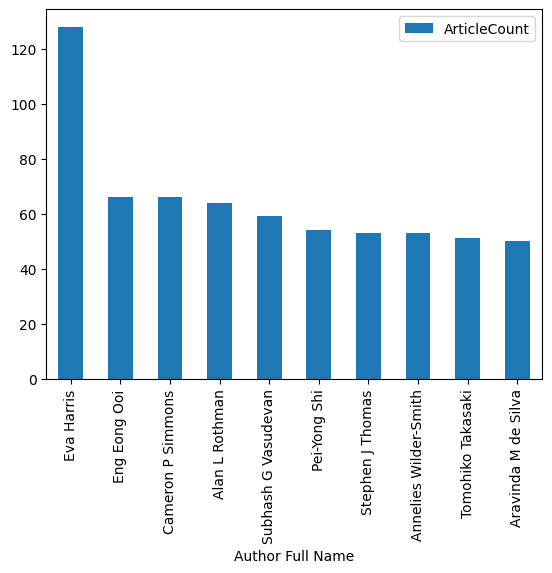

In [ ]:
#create bar based on the top 10 most active authors of all time
articles_bar = most_active_10.plot.bar(x = "Author Full Name", y = "ArticleCount")

In [22]:
#Top 10 active reasearchers (based on number of articles published in the last 5 years)

#Merging both the datasets
merged_df = pd.merge(articles_data, authors_data, on = 'PMID')
merged_df.head(10)


#Selecting articles posted between 2018 and 2024
selected_rows = merged_df[(merged_df['Year'] >= 2018) & (merged_df['Year'] <= 2024)]
#SR_sort= selected_rows.sort_values(by = 'Year', ascending = False)
#SR_sort

author_article_counts = selected_rows.groupby(['AuthorForename', 'AuthorLastname']).agg({'PMID': 'count'}).reset_index()
aac = author_article_counts.sort_values(by = 'PMID', ascending = False)
aac = aac.rename(columns ={'PMID':'No. of articles published'})
top_10_articles = aac.head(10)
top_10_articles

,AuthorForename,AuthorLastname,No. of articles published
6022,Eva,Harris,38
6791,Gabriela,Paz-Bailey,35
20317,Stephen J,Thomas,26
17262,R Tedjo,Sasmono,23
11102,Kouichi,Morita,21
5782,Eng Eong,Ooi,21
17899,Richard G,Jarman,20
21721,Tyler M,Sharp,19
3052,Cameron P,Simmons,19
11428,Laura E,Adams,19


In [23]:
#Create new column of first and last name for visualisations
top_10_articles['Author Full Name'] = top_10_articles['AuthorForename'] + ' ' + top_10_articles['AuthorLastname']
top_10_articles

<ipython-input-23-07c564857ae4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,AuthorForename,AuthorLastname,No. of articles published,Author Full Name
6022,Eva,Harris,38,Eva Harris
6791,Gabriela,Paz-Bailey,35,Gabriela Paz-Bailey
20317,Stephen J,Thomas,26,Stephen J Thomas
17262,R Tedjo,Sasmono,23,R Tedjo Sasmono
11102,Kouichi,Morita,21,Kouichi Morita
5782,Eng Eong,Ooi,21,Eng Eong Ooi
17899,Richard G,Jarman,20,Richard G Jarman
21721,Tyler M,Sharp,19,Tyler M Sharp
3052,Cameron P,Simmons,19,Cameron P Simmons
11428,Laura E,Adams,19,Laura E Adams


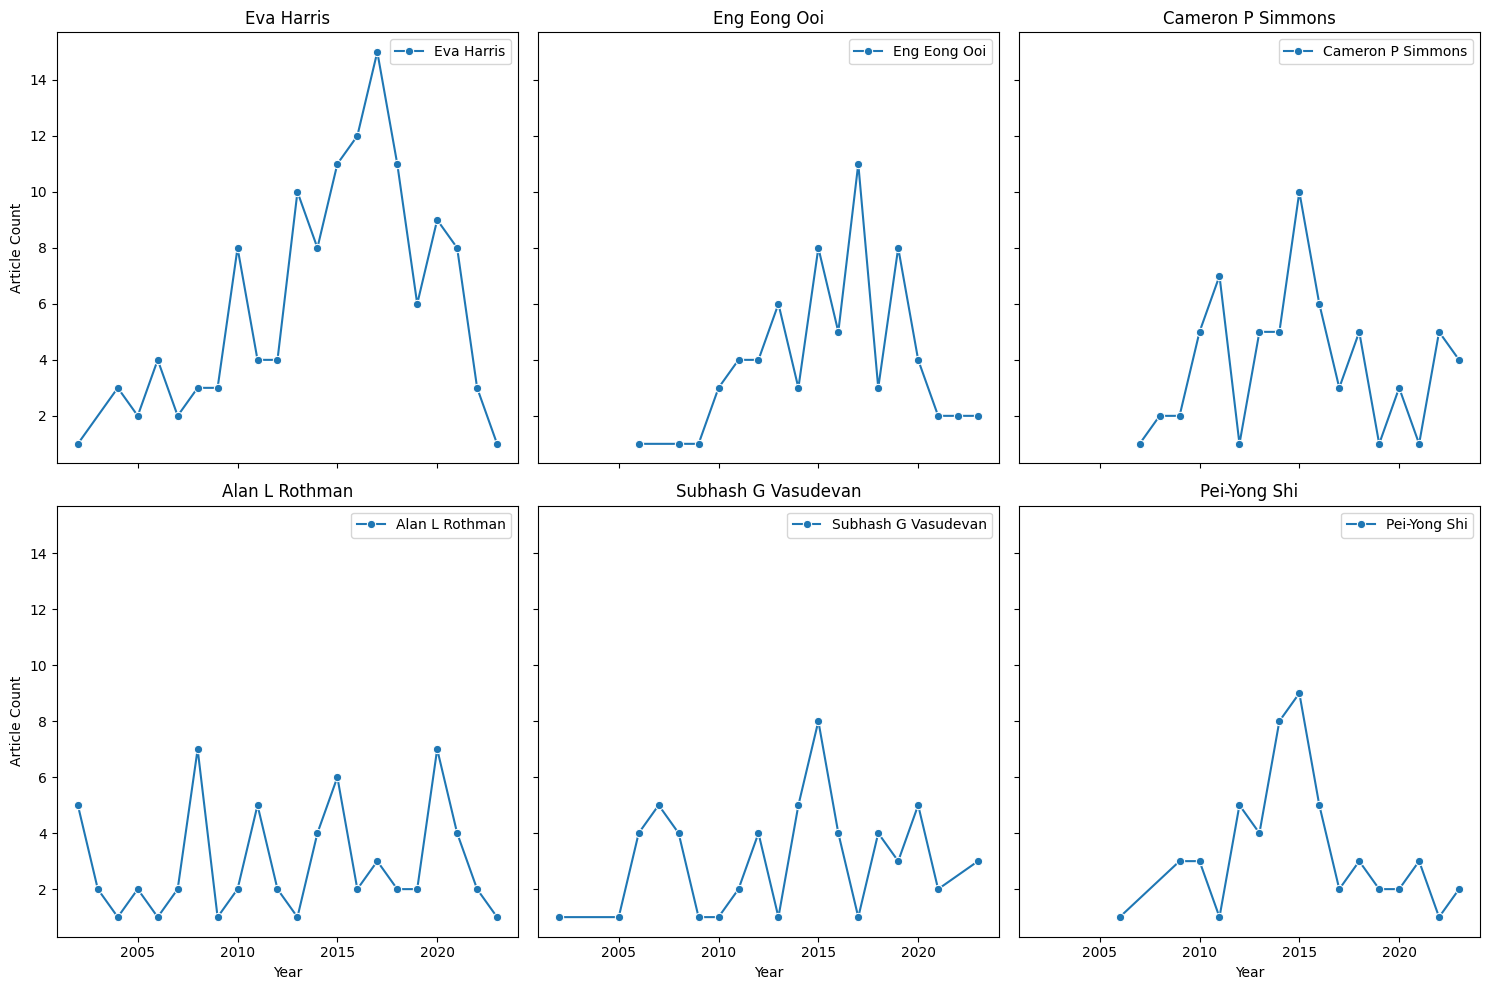

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your data
#data = {
#    'Author Full Name': ['Eva Harris', 'In-Kyu Yoon', 'Tyler M Sharp', 'Eva Harris', 'Eva Harris', 'Eng Eong Ooi', 'Gabriela Paz-Bailey', 'Aravinda M de Silva', 'Eva Harris', 'Annelies Wilder-Smith', 'Aravinda M de Silva', 'Eva Harris', 'Cameron P Simmons', 'Richard G Jarman', 'Stephen J Thomas', 'Tomohiko Takasaki', 'Pei-Yong Shi', 'Laura E Adams', 'Eva Harris', 'Stefan Fernandez','Eva Harris'],
#    'Year': [2017, 2015, 2016, 2016, 2015, 2017, 2023, 2018, 2018, 2016, 2017, 2013, 2015, 2020, 2020, 2016, 2015, 2023, 2020, 2015, 2016],
#    'Article Count': [15, 12, 12, 12, 11, 11, 11, 11, 11, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 8],
#}

#df = pd.DataFrame(data)

# Select the top 5 authors
top_5_authors = article_counts1.groupby('Author Full Name')['Article Count'].sum().nlargest(6).index

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharex=True, sharey=True)

for i, author in enumerate(top_5_authors):
    ax = axes.flatten()[i]
    df_author = article_counts1[article_counts1['Author Full Name'] == author]
    sns.lineplot(data=df_author, x='Year', y='Article Count', marker='o', label=author, ax=ax)
    ax.set_title(f'{author}')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
#Pie chart based on the top 10 authors with the most articles between 2018 and 2024
import plotly.express as px
fig = px.pie(top_10_articles, values='No. of articles published', names='Author Full Name')
fig.show()

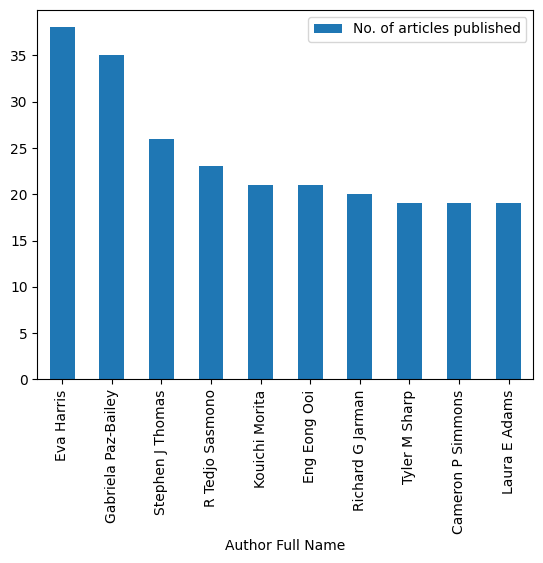

In [ ]:
#create bar based on the authors with the top 10 articles between 2018 and 2024
articles_bar = top_10_articles.plot.bar(x = "Author Full Name", y = "No. of articles published")